<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-9/blob/main/Semana_3_Actividad_1_Selecci%C3%B3n_y_Limpieza_de_datos_Equipo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 1 - Semana 3**


## **Equipo 9:**
Luis Salvador Cruz Najera - A01002111

Laura Elena Hernández Mata - A01169213

## **Datos de la materia:**

Ciencia y Analítica de datos

TC4029.10
	
## **Profesor titular:**

Jobish Vallikavungal Devassia

## **Fecha de entrega:**

4 de octubre de 2022

# **Parte 1: Fundamentos de bases de datos**

##**Fundamentos de bases de datos y para ciencia de datos.**  

En ciencia de datos, las bases de datos son esenciales, ya que estás permiten responder a preguntas clave de algún fenómeno. Algunas de estas preguntas son qué está pasando, qué pasará más adelante, por qué está ocurriendo, entre otras. Estás preguntas se resuelven a través de principios matemáticos y estadísticos, y se pueden aplicar metodologías de aprendizaje automático e inteligencia artificial. Si bien es importante una estructura adecuada de los datos para su análisis, hay métodos que sirven para limpiar, transformar y homologar la información, lo cual prepara los datos para el análisis. En este sentido, la ciencia de datos busca darle un significado a la información, que permita así su entendimiento y aplicación en distintas áreas e industrias.

##**Fundamentos de almacenes de datos (Data Warehouse) para ciencia de datos.**

Los almacenes de datos, también conocidos como Data Warehouse son estructuras tecnológicas que cuentan con componentes básicos, tales como una base de datos donde se centraliza la información; herramientas para extraer, transformar y cargar datos; herramientas de seguridad y acceso; y metadatos. Los tipos de datos que pueden contener son muy variados, entre los que pueden estar transacciones históricas, o bien, cualquier otro tipo de información que se haya recopilado a través del tiempo en diversas fuentes. Dado que la información contenida en el Data Warehouse se utiliza para un entorno organizacional o de alguna industria en particular, sin importar el objetivo, su contenido debe ser información fiable y homogénea, y cuya arquitectura permita consultar, tratar y jerarquizar su contenido.

## **Data Set Information:**

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; 

X7 = the repayment status in August, 2005; . . .;

X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


Relevant Papers:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.



Citation Request:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.


**1.- Importamos las librerías necesarias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**2.- Cargamos en la variable df el archivo csv e indicamos con cuales columnas estaremos trabajando, al final mostramos los primero 5 registros**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv", 
                 usecols=["ID", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12", "X13", "X14", "X15", "X16", "X17", "X18", "X19", "X20", "X21", "X22", "X23", "Y"],)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


**3.- Renombramos las columnas para una mejor identificación de los datos**

In [ ]:
df = df.rename(columns = {'X1':'monto_credito',
                          'X2':'genero',
                          'X3':'nivel_educativo',
                          'X4':'estado_civil',
                          'X5':'edad',
                          'X6':'pago_sept_2005',
                          'X7':'pago_agosto_2005',
                          'X8':'pago_julio_2005',
                          'X9':'pago_junio_2005',
                          'X10':'pago_mayo_2005',
                          'X11':'pago_abril_2005',
                          'X12':'amortizacion_sept_2005',
                          'X13':'amortizacion_agosto_2005',
                          'X14':'amortizacion_julio_2005',
                          'X15':'amortizacion_junio_2005',
                          'X16':'amortizacion_mayo_2005',
                          'X17':'amortizacion_abril_2005',
                          'X18':'pagoprev_sept_2005',
                          'X19':'pagoprev_agosto_2005',
                          'X20':'pagoprev_julio_2005',
                          'X21':'pagoprev_junio_2005',
                          'X22':'pagoprev_mayo_2005',
                          'X23':'pagoprev_abril_2005'}, inplace = False)

df.head()

,ID,monto_credito,genero,nivel_educativo,estado_civil,edad,pago_sept_2005,pago_agosto_2005,pago_julio_2005,pago_junio_2005,...,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_julio_2005,pagoprev_junio_2005,pagoprev_mayo_2005,pagoprev_abril_2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


**4.- Observamos la cantidad de nulos por columna**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        30000 non-null  int64  
 1   monto_credito             30000 non-null  int64  
 2   genero                    29999 non-null  float64
 3   nivel_educativo           29998 non-null  float64
 4   estado_civil              29998 non-null  float64
 5   edad                      29995 non-null  float64
 6   pago_sept_2005            29997 non-null  float64
 7   pago_agosto_2005          29995 non-null  float64
 8   pago_julio_2005           29993 non-null  float64
 9   pago_junio_2005           29991 non-null  float64
 10  pago_mayo_2005            29984 non-null  float64
 11  pago_abril_2005           29986 non-null  float64
 12  amortizacion_sept_2005    29989 non-null  float64
 13  amortizacion_agosto_2005  29989 non-null  float64
 14  amorti

**5.-El método isnull().values.any(), puede verificar si un DataFrame de Pandas contiene valores NaN/None en cualquier celda (todas las filas y columnas). Este método devuelve True si encuentra NaN/None en cualquier celda de un DataFrame, devuelve False cuando no se encuentra**

In [ ]:
df.isnull().values.any()

True

**6.-El método df.isnull().any() muestra si una columna tiene o no tiene valores nulos**

In [ ]:
df.isnull().any()

ID                          False
monto_credito               False
genero                       True
nivel_educativo              True
estado_civil                 True
edad                         True
pago_sept_2005               True
pago_agosto_2005             True
pago_julio_2005              True
pago_junio_2005              True
pago_mayo_2005               True
pago_abril_2005              True
amortizacion_sept_2005       True
amortizacion_agosto_2005     True
amortizacion_julio_2005      True
amortizacion_junio_2005      True
amortizacion_mayo_2005       True
amortizacion_abril_2005      True
pagoprev_sept_2005           True
pagoprev_agosto_2005         True
pagoprev_julio_2005          True
pagoprev_junio_2005          True
pagoprev_mayo_2005           True
pagoprev_abril_2005          True
Y                            True
dtype: bool

**7.- Observamos la distrubución de cada columna o característica**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2749fff10>,
      dtype=object)

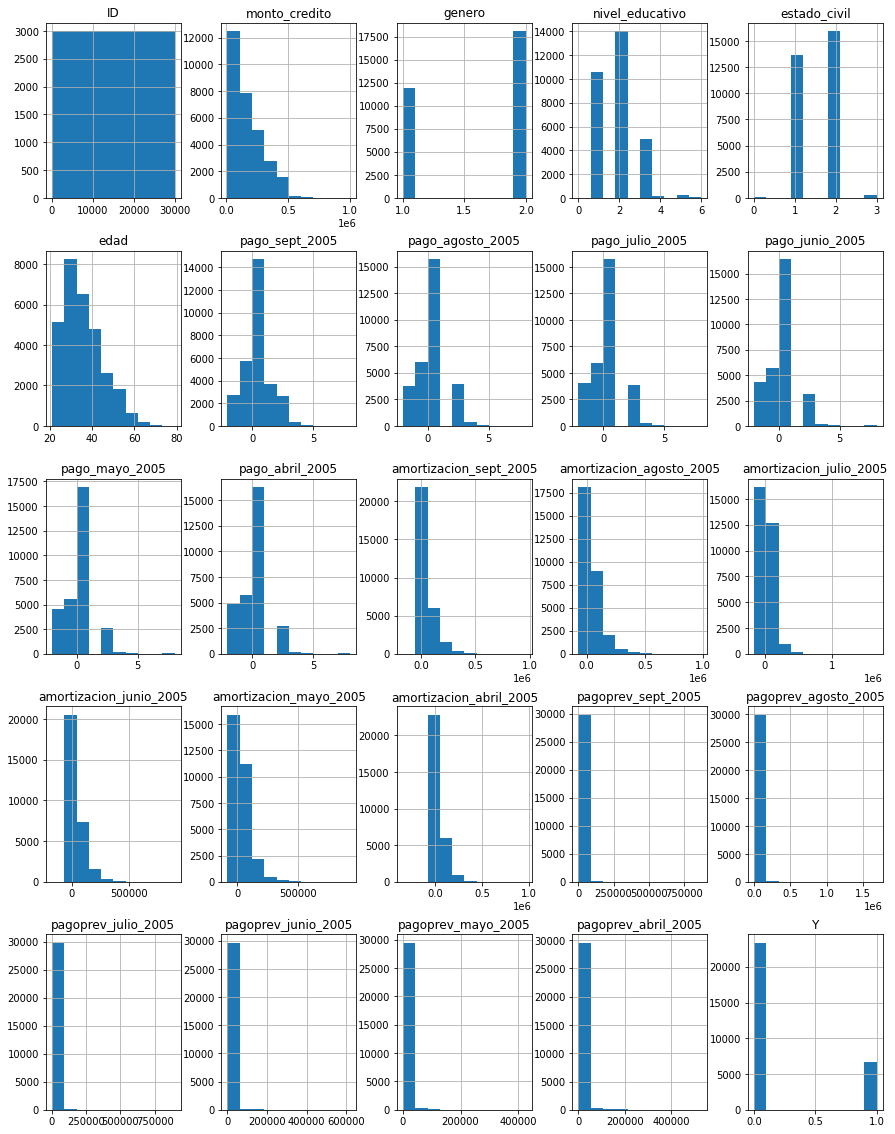

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

# **Parte 2: Selección y limpieza de los Datos en Python**

## **Estrategía 1.- Eliminación de renglones/columnas con datos faltantes**

**1.1.- Como primer paso realizamos una copia del dataset original para no perder los cambios realizados hasta ahora, posteriomente utilizamos el método dropna para eliminar los registros con valores nulos, observamos que una vez eliminados ya no poseemos valores nulos en nuestro dataset**

In [ ]:
ndf = df.copy()
ndf.dropna(inplace = True)
print("¿Existen valores nulos?", ndf.isna().values.any())
print("Número de registros eliminados:", len(df) - len(ndf))

¿Existen valores nulos? False
Número de registros eliminados: 42


**1.2.- Como primer paso realizamos una copia del dataset original para no perder los cambios realizados hasta ahora, posteriomente utilizamos el método dropna con el valor axis=1 para eliminar las columnas con valores nulos, observamos que solo logramos conservar 2 columnas, el ID y el monto del crédito**

In [ ]:
ndf = df.copy()
ndf.dropna(axis = 1, inplace = True) # axis 1 son columnas / axis 0 son renglones. 
print("Número de renglones: ", len(ndf))
ndf.head()

Número de renglones:  30000


,ID,monto_credito
0,1,20000
1,2,120000
2,3,90000
3,4,50000
4,5,50000


**1.3.- Como primer paso realizamos una copia del dataset original para no perder los cambios realizados hasta ahora, posteriomente utilizamos el método dropna con el valor how=all para eliminar los renglones donde todos los elementos son nulos, dado que no se cumple esta condición, se conservan todos**

In [ ]:
ndf = df.copy()
ndf.dropna(how='all', inplace = True)
print("Número de renglones: ", len(ndf))
ndf.head()

Número de renglones:  30000


,ID,monto_credito,genero,nivel_educativo,estado_civil,edad,pago_sept_2005,pago_agosto_2005,pago_julio_2005,pago_junio_2005,...,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_julio_2005,pagoprev_junio_2005,pagoprev_mayo_2005,pagoprev_abril_2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


**1.4.- Como primer paso realizamos una copia del dataset original para no perder los cambios realizados hasta ahora, posteriomente utilizamos el método dropna con el valor thresh=4 para eliminar los renglones donde al menos se tengan "n" elementos no nulos para ser conservados**

In [ ]:
ndf = df.copy()
ndf.dropna(thresh=25, inplace = True)
print("Número de renglones: ", len(ndf))
ndf.head()

Número de renglones:  29958


,ID,monto_credito,genero,nivel_educativo,estado_civil,edad,pago_sept_2005,pago_agosto_2005,pago_julio_2005,pago_junio_2005,...,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_julio_2005,pagoprev_junio_2005,pagoprev_mayo_2005,pagoprev_abril_2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


**1.5.- Como primer paso realizamos una copia del dataset original para no perder los cambios realizados hasta ahora, posteriomente utilizamos el método dropna con el valor thresh=n y axis=1 para eliminar las columnas donde al menos se tengan "n" elementos no nulos para ser conservados**

In [ ]:
ndf = df.copy()
ndf.dropna(thresh = 5, axis = 1, inplace = True) 
print("Número de renglones: ", len(ndf))
ndf.head()

Número de renglones:  30000


,ID,monto_credito,genero,nivel_educativo,estado_civil,edad,pago_sept_2005,pago_agosto_2005,pago_julio_2005,pago_junio_2005,...,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_julio_2005,pagoprev_junio_2005,pagoprev_mayo_2005,pagoprev_abril_2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


## **Estrategía 2.- Imputación de datos faltantes**

**2.1.- Como primer paso realizamos una copia del dataset original para no perder los cambios realizados hasta ahora, posteriomente obtenemos la media del campo a imputar**

In [ ]:
ndf = df.copy()
amortizacion_mayo_2005 = ndf.amortizacion_mayo_2005.mean()
print("Media del campo amortizacion_mayo_2005:", amortizacion_mayo_2005)

Media del campo amortizacion_mayo_2005: 40324.49397992196


In [ ]:
# Una vez que tenemos la media, imputamos el valor en la columna
ndf['amortizacion_mayo_2005'].fillna(value = amortizacion_mayo_2005, inplace = True)
ndf.head()

,ID,monto_credito,genero,nivel_educativo,estado_civil,edad,pago_sept_2005,pago_agosto_2005,pago_julio_2005,pago_junio_2005,...,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_julio_2005,pagoprev_junio_2005,pagoprev_mayo_2005,pagoprev_abril_2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
# Verificamos que ya no tenemos valores nulos en la columna imputada
print(ndf['amortizacion_mayo_2005'].isnull().values.any())

False


**2.2.- Como primer paso realizamos una copia del dataset original para no perder los cambios realizados hasta ahora, posteriomente imputamos con la mediana**

In [ ]:
ndf = df.copy()
ndf['amortizacion_junio_2005'].fillna(value = ndf.amortizacion_junio_2005.median(), inplace = True)
ndf.head()

,ID,monto_credito,genero,nivel_educativo,estado_civil,edad,pago_sept_2005,pago_agosto_2005,pago_julio_2005,pago_junio_2005,...,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_julio_2005,pagoprev_junio_2005,pagoprev_mayo_2005,pagoprev_abril_2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
# Verificamos que ya no tenemos valores nulos en la columna imputada
print(ndf['amortizacion_junio_2005'].isnull().values.any())

False


**2.3.- Como primer paso realizamos una copia del dataset original para no perder los cambios realizados hasta ahora, posteriomente imputamos con la moda**

In [ ]:
ndf = df.copy()
ndf['amortizacion_mayo_2005'].fillna(value = ndf.amortizacion_mayo_2005.median(), inplace = True)
ndf.head()

,ID,monto_credito,genero,nivel_educativo,estado_civil,edad,pago_sept_2005,pago_agosto_2005,pago_julio_2005,pago_junio_2005,...,amortizacion_junio_2005,amortizacion_mayo_2005,amortizacion_abril_2005,pagoprev_sept_2005,pagoprev_agosto_2005,pagoprev_julio_2005,pagoprev_junio_2005,pagoprev_mayo_2005,pagoprev_abril_2005,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
# Verificamos que ya no tenemos valores nulos en la columna imputada
print(ndf['amortizacion_mayo_2005'].isnull().values.any())

False


**2.4.- Como primer paso realizamos una copia del dataset original para no perder los cambios realizados hasta ahora, posteriomente eliminamos los renglones específicos donde hay nulos**

In [ ]:
ndf = df.copy()
ndf.dropna(subset=['genero', 'nivel_educativo'], inplace = True)
len(ndf)

29998

**2.5.- Como primer paso realizamos una copia del dataset original para no perder los cambios realizados hasta ahora, imputamos dos columnas con dos estrategías diferentes**

In [ ]:
ndf.amortizacion_mayo_2005.fillna(ndf.amortizacion_mayo_2005.mode()[0], inplace=True)
ndf.amortizacion_junio_2005.fillna(ndf.amortizacion_junio_2005.mean(), inplace=True)
ndf.head()
print(ndf['amortizacion_mayo_2005'].isnull().values.any())
print(ndf['amortizacion_junio_2005'].isnull().values.any())

False
False


# **Parte 3: Preparación de los datos**

**¿Qué datos considero mas importantes? ¿Por qué?**

*Los datos que consideramos más importantes son el historial de pagos pasados y el monto del crédito. Porque simplemente con esos dos valores, se puede estimar pagos futuros o, inclusive, si será impagable el crédito. Igualmente, consideramos que la educación y el estado civil también son relevantes, ya que a mayor educación se podría esperar mayores ingresos y, normalmente, las personas que tienen estado civil casado pueden llegar a tener otras necesidades crediticias, tales como hipotecas o bien, verse en la necesidad de apoyar a su pareja en los gastos del hogar en caso de desempleo de una de las partes.*

**¿Se eliminaron o reemplazaron datos nulos? ¿Qué se hizo y por qué?**

*En un inicio, probamos la opción de reemplazar los datos, ya que al eliminar habíamos pensado que se podría llegar a perder información muy valiosa para el modelo. En este sentido, primero renombramos las columnas para tener bien identificados los contenidos y contabilizamos los nulos, esto para lograr un overview adecuado. Dado que nos percatamos que todas las columnas tenían valores nulo, excepto por ID y monto de crédito, decidimos imputar los datos faltantes a través de medias, medianas y modas. Sin embargo, después de hacer el análisis final de los resultados obtenidos, decidimos que es mejor eliminar los faltantes, ya que al quitarlos sólo estaríamos quitando 42 de los 30,000 registros, lo cual permitirá de cualquier manera hacer un modelo con la información que resta y no se vió una afectación por su eliminación.*

**¿Es necesario ordenar los datos para el análisis? Sí / No / ¿Por qué?**

**¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.**

**¿Qué ajustes se realizaron en el proceso de limpieza de datos (agregar, integrar, eliminar, modificar registros (filas), cambiar atributos (columnas)?**

**¿Qué tipos de ruido se han producido en los datos?**

**¿Qué métodos utiliza para eliminar el ruido?**

**¿Qué técnicas han demostrado ser eficaces?**

**¿Existen casos o atributos que no se pueden recuperar?**

**Asegúrese de registrar los datos que se han excluido por causas del ruido.**

# **Fuentes consultadas**

Kane, F. (2017). Hands-on data science and python machine learning. Packt Publishing Ltd. PP. 261-264.

Teate, R. (2021) Chapter 1: Data sources, in SQL for Data Scientists  A Beginner's Guide for Building Datasets for Analysis. Wiley.

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.